___
# MINIPROJETO 1

## <font color='red'>Leonadro Grotti</font>
___

## <font color='blue'>Nivel de fertilidade adolescentes (número de nascimentos por 1000 mulhere com idade de 15 a 19 anos)</font>

___
### Itens 1 a 3 - Resolução:

In [320]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Asus Pro\Downloads


In [321]:
dados = pd.read_excel('database1.xlsx', sep=',')
dados.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,Ano2014,2015
0,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,106.2062,102.8116,99.417,94.4542,89.4914,84.5286,...,34.9382,33.393,32.0268,30.6606,29.2944,27.9282,26.562,24.8420,23.1220,NaN
1,Andorra,AND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,145.3210,145.3210,145.321,145.3210,145.3210,145.3210,...,123.1616,117.390,111.4708,105.5516,99.6324,93.7132,87.794,82.2638,76.7336,NaN
3,Angola,AGO,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,234.6840,235.0020,235.320,235.3200,235.3200,235.3200,...,191.9584,188.404,185.9120,183.4200,180.9280,178.4360,175.944,171.2734,166.6028,NaN
4,Albania,ALB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,54.4408,56.1654,57.890,55.3680,52.8460,50.3240,...,18.7270,18.600,19.0396,19.4792,19.9188,20.3584,20.798,21.1438,21.4896,NaN


In [322]:
dados.shape

(264, 60)

In [323]:
d=pd.DataFrame()
d['Ano_2014']=dados[~dados.Ano2014.isnull()].Ano2014

In [324]:
d['Ano_2014'].describe()

count    240.000000
mean      48.097278
std       37.975924
min        0.560800
25%       16.809850
50%       40.008900
75%       68.621000
max      203.604000
Name: Ano_2014, dtype: float64

In [325]:
media = 48.97278


In [326]:
faixa = np.arange (0,203,3)

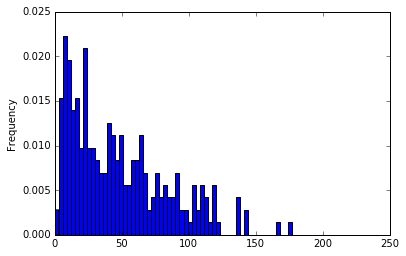

In [327]:
plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)
#freq_rel = d['Ano_2014'].value_counts(True)
#print(freq_rel)

___
### Itens 4 a 6 - Resolução:

## Questão 4

###  Dado que neste histograma sua média é maior que sua mediana, e essa, maior que sua moda, ele é assimétrico à direita ou positivo.

### Distribuição de Poisson: A distribuição  de  Poisson  é  empregada  em  experimentos,  nos  quais  não  se  está interessado  no  número  de  sucessos obtidos  em  n tentativas,  mas  sim  no  número  de  sucessos  ocorridos durante um intervalo contínuo, que pode ser um intervalo de tempo, espaço, etc. 
Ou seja a distribuição de Poisson é usada para encontrar a probabilidade de um número designado de sucessos por unidade de
intervalo por exemplo o número de nascimentos por 1000 mulheres (para meninas de 15 anos a 18 anos) em um determinado período de tempo ou o número de nascimentos por 1000 mulheres (para meninas de 15 anos a 18 anos) em determinados países como é o caso estudado acima, o único defeito desse modelo é que quando pegamos os países como intervalo de espaço, o mesmo passa a não ser contínuo.

### Distribuição Binomial negativa: A distribuição Binomial negativa estuda a probabilidade de se obter um número certo de sucesso em k tentativas.


Ou seja caso tivessemos como objetivo aumentar a quantidade de filhos por 1000 mulheres e considerassemos como sucesso ter mais que 70 filhos poderiamos calcular a probabilidade de ter pelo menos tres paises entre cada dez escolhidos com essa taxa mínima de filhos.

## Questão 5

In [328]:
d['Ano_2014'].describe()

count    240.000000
mean      48.097278
std       37.975924
min        0.560800
25%       16.809850
50%       40.008900
75%       68.621000
max      203.604000
Name: Ano_2014, dtype: float64

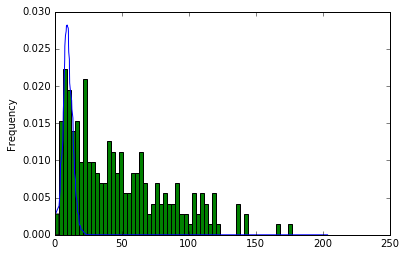

In [329]:
x = sorted(d.Ano_2014)
k = np.arange(0,240,1)
plt.plot(x,stats.poisson.pmf(k,200 ,loc=-170))
plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)


### Ao usar a distribuição de poisson, não obtive um resultado muito próximo ao do gráfico mesmo alterando o valor da média, chegando a conclusão de que essa distribuição não serve para essa distribuição.

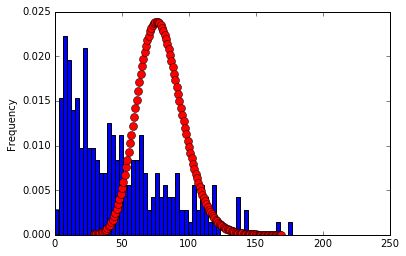

In [330]:

from scipy.stats import nbinom
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 30.0, 0.275
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')

x = np.arange(nbinom.ppf(0.0001, n, p),
              nbinom.ppf(0.99999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo',color='red', ms=8, label='nbinom pmf')



plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)


### O mesmo aconteceu com o gráfico da distribuição binomial negativa onde, novamente, o resultado esperado não foi alcançado.
### Devido ao fato das distribuições escolhidas no exercício 4 não representarem bem o meu histograma eu fui atras de outras distribuições que se aproximassem mais com o histograma

### Depois de pesquisar os gráficos das distribuições cheguei a conclusão de que a gamma e a exponencial poderiam se aproximar muito do histograma, como desejado, e portanto fiz plotei os graficos das mesmas com o histograma:

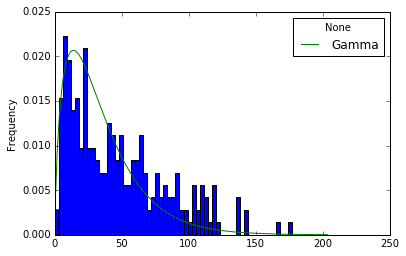

In [331]:
x = sorted(d.Ano_2014)

tempos = np.linspace(0, 70, 100)

# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_gamma = 1.65

# Estimamos theta da distribuição gamma
theta_gamma = tempos.mean()/k_gamma

gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)

plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.legend()

plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)

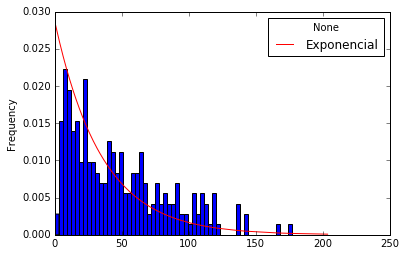

In [332]:
mu_exp = tempos.mean()

exponencial = stats.expon.pdf(x, scale=mu_exp, loc = 0)
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica
plt.legend()

plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)


### Dessa vez os resultados foram muito melhores e portanto seguirei usando essas distribuições

## Questão 6

In [333]:
stats.gamma.fit(d.Ano_2014)

(1.3651134088398174, 0.38952081890314066, 34.947836360997854)

In [334]:
print (k_gamma)

1.65


valor de referencia inicial = 0 (loc)

In [335]:
print (theta_gamma)

21.2121212121


### Os valores escolhidos por mim : k_gama, valor de referencia inicial estão próximos dos valores teóricos o que me mostra que a escolha foi boa e portanto não preciso trocar os valores, no entanto, o valor de theta_gama foge do valor passado pelo fit o que mostra que esse parametro talvez não tenha sido bem escolhido

In [336]:
stats.expon.fit(d.Ano_2014)


(0.5607999659635331, 1.9602345629557347)

In [337]:
print(mu_exp)

35.0


valor de referencia inicial = 0 (loc)

### Nesse caso os valores definidos por mim não se aproximam aos passados pelo fit o que me leva a pensar que possivelmente os parametros não estão tão bons e que seja melhor seguir com os valores passados pelo fit

___
### Itens 7 a 9 - Resolução:

## Questão 7

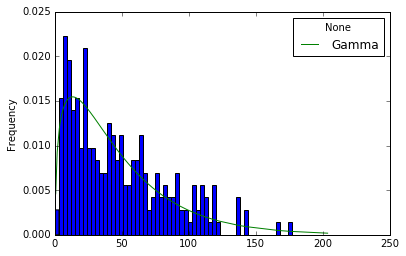

In [338]:

a1 = 1.3651134088398174
theta_gamma1 = 34.947836360997854
gamma = stats.gamma.pdf(x, scale=theta_gamma1, loc=0.38952081890314066, a=a1)
plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.legend()

plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)


### Esse gráfico representa a distribuição gamma com os valores passados pelo fit. Ele se aproximou muito ao histograma com os dados mostrando que de fato esses valores são bons para essa situação.

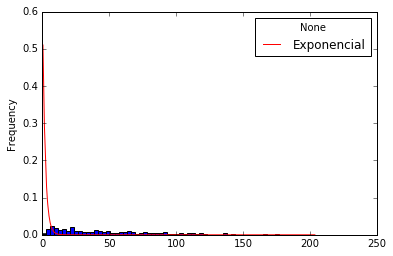

In [339]:
mu_exp1 = 1.9602345629557347  
exponencial = stats.expon.pdf(x, scale=mu_exp1, loc = 0.5607999659635331)
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica
plt.legend()

plot = d.Ano_2014.plot.hist(normed=True, bins=faixa)

### Nesse caso a distribuição exponencial  que foi plotado foi a  com os valores passados pelo fit e dessa vez os valores não ficaram perto dos reais


## Questão 8

### Esse gráfico esá comparando os valores passados pelo histograma com os valores passados pelo fit, para a gamma os valores ficaram muito proximos dos reais, principalmente no início, no entanto, os valores da exponencial fugiram muito dos valores reais

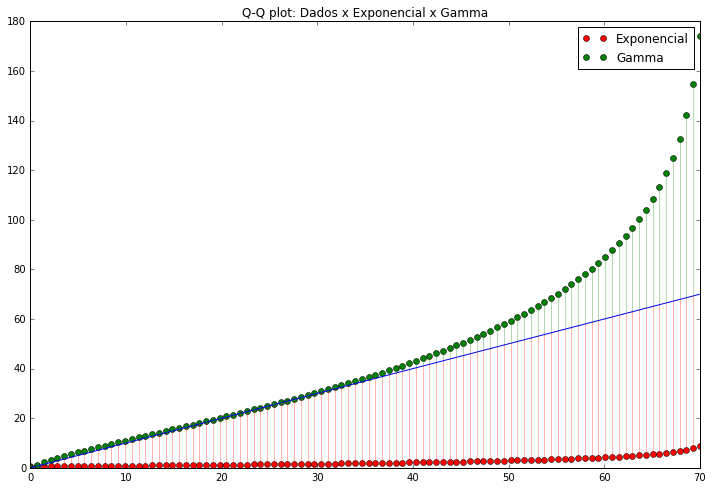

In [340]:

tempos = np.linspace(0, 70, 100)
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(tempos)):
    acc = (i - 0.5) / len(tempos)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra,scale=mu_exp1, loc = 0.5607999659635331) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma1, loc=0.38952081890314066, a=a1)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(tempos, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(tempos, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_exp[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_gamma[i], tempos[i]), '-', color='green', alpha=0.3  )

### Esse gráfico mostra a diferença de cada ponto do gráfico real com a linha feita pela distribuição gamma e exponencial COM OS VALORES TESTADOS POR MIM.

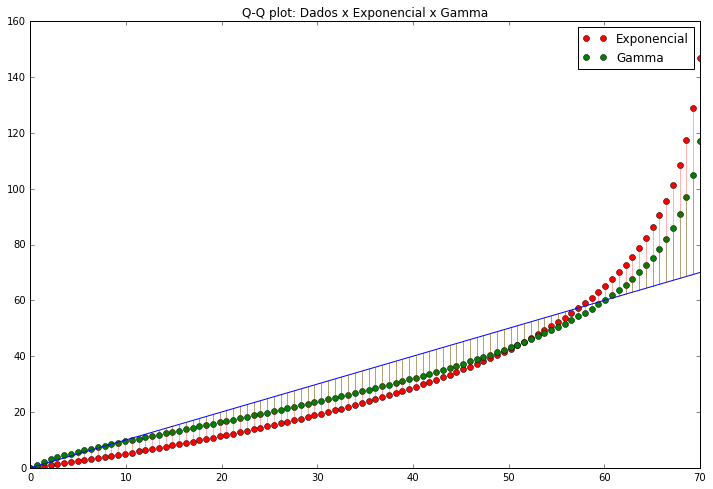

In [341]:

tempos = np.linspace(0, 70, 100)
# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(tempos)):
    acc = (i - 0.5) / len(tempos)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, scale=mu_exp) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(tempos, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(tempos, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_exp[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_gamma[i], tempos[i]), '-', color='green', alpha=0.3  )


## Questão 9

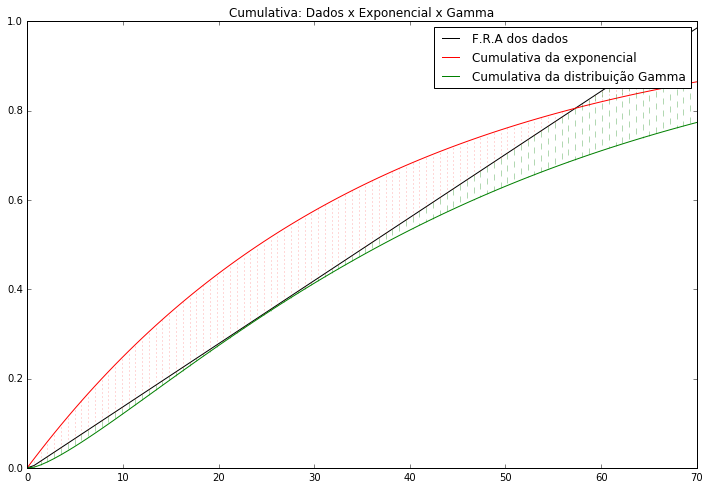

In [342]:

cdf_exponencial = stats.expon.cdf(tempos, scale=mu_exp) #FDA
cdf_gamma = stats.gamma.cdf(tempos, scale=theta_gamma1, loc=0.38952081890314066, a=a1)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(tempos, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(tempos, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

### Nesse gráfico estamos comparando a frequencia relativa acumulada dos dados reais com os propostos por mim (daqui em diante seguirei somente com essa analise pois ela esta mais proxima da realidade)

___
### Itens 10 e 11 - Resolução:

## Questão 10

### Erro quadratico:

In [355]:
erro_quadratico_exponencial = sum((tempos - q_exp)**2)
erro_quadratico_gamma = sum((tempos - q_gamma)**2)

print("Erro quadrático da exponencial :{:4.3f}\n".format(erro_quadratico_exponencial))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma))

Erro quadrático da exponencial :23277.960

Erro quadrático da gamma :8218.729



### Aqui podemos perceber que o erro é menor na distribuição gamma

### Erro quadrático médio

In [354]:
eqm_exp = erro_quadratico_exponencial/len(tempos)
eqm_gamma = erro_quadratico_gamma/len(tempos)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 232.779602618
Erro quadratico médio da gamma : 82.1872870919


### Novamente o erro segue menor na gamma

### Soma de diferenças

In [345]:
soma_diferenças_exponencial = sum(abs(tempos - q_exp))
soma_diferenças_gamma = sum(abs(tempos - q_gamma))

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)


Soma de diferenças da exponencial : 1037.70385869
Soma de diferenças da gamma : 599.911090607


### Como nas outras a gamma mantém um valor melhor do que a exponencial

### Erro quadrático nas CDFs

In [348]:
# Erro quadrático nas CDFs
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A ", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A ", erro_quad_cdf_gamma)


Erro quadrático da CDF da Exponencial versus F.R.A  1.21864525416
Erro quadrático da CDF da Gamma versus F.R.A  0.636857335856


### Novamente os valores retornados pela distribuição gamma são melhores

### Diferenças absolutas

In [349]:
# Diferenças absolutas
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 9.84161271837786 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 5.237289995362518


### A partir dos resultados acima, podemos ver que o erro da soma do módulo das diferenças entre f.r.a e cumulativa é menor no caso da distribuição gamma com os parâmetros testados. Portanto a *gamma com estes parâmetros testados oferece o melhor ajuste**. 

### Teste de aderência de Kolmogorov-Smirnov

In [350]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(mu_exp, ks_aderencia_exp, theta_gamma, k_gamma, ks_aderencia_gamma))

Teste K-S para a exponencial com μ= 35.00: 0.162
Teste K-S para a gamma com scale=21.212, loc=0 e a=1.650  0.211:


### Com esse teste percebemos que o gráfico tem maior compatibilidade com a distribuição gamma e com a mesma no valor de 1,650

## Questão 11

A tabela da questão 11 será passada junto com este arquivo , no entanto , no fromato de uma foto  pois não sabia como fazer tabelas aqui.

## A conclusão qu eeu cheguei com a mesma foi semelhante ao que ja vinha percebendo sobre a superioridade da distribuição gamma quanto a exponencial para a analise desse gráfico em especifico